In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 



In [39]:
df = pd.read_csv("Churn_Modelling 1.csv")
print(df.head(10))
print(df)


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0       

In [40]:
df.info() #for information the data 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Churn            10000 non-null  object 
 15  Shetizen         10000 non-null  object 
dtypes: float64(2), int64(9), object(5)
memory usage: 1.2+ MB


In [41]:
#replace the value in zero 
df["EstimatedSalary"] = df["EstimatedSalary"].replace(" ","NON")
df["EstimatedSalary"] = df["EstimatedSalary"].astype("float")
print(df["EstimatedSalary"])
print(df)

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64
      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu         

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Churn            10000 non-null  object 
 15  Shetizen         10000 non-null  object 
dtypes: float64(2), int64(9), object(5)
memory usage: 1.2+ MB


In [43]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn,Shetizen
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
#sum of all null value 
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Churn              0
Shetizen           0
dtype: int64

In [45]:
#decribe the table # tenure is show monthly based subscription
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [46]:
#check duplication data
df.duplicated().sum()

np.int64(0)

In [47]:
df["CustomerId"].duplicated().sum()

np.int64(0)

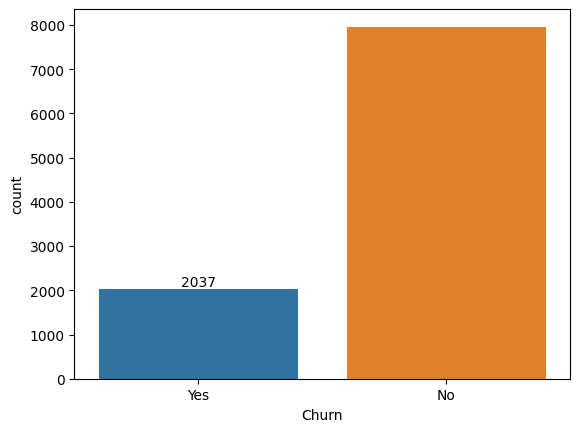

In [48]:
# for sns is use for the count the yes and no value in churn data 
ax = sns.countplot(x = 'Churn' , data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.show()

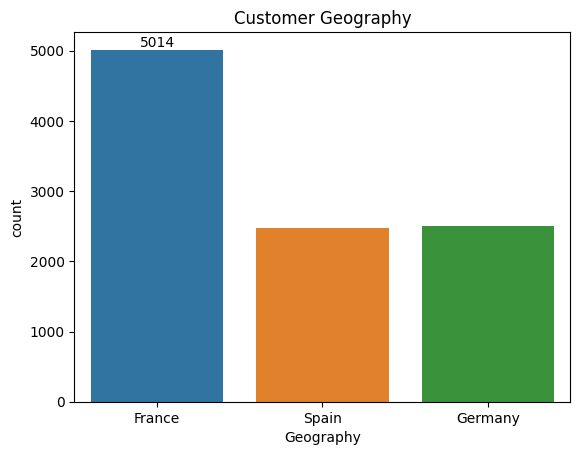

In [59]:
# find a accurate data in the churn 
ax = sns.countplot(x = 'Geography' , data = df, hue = "Geography")
ax.bar_label(ax.containers[0])
plt.title("Customer Geography")
plt.show()

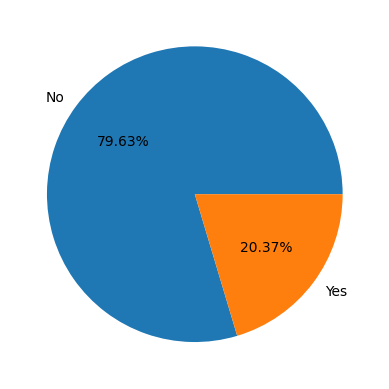

In [60]:
# this is for make a pie chart of the graph
plt.pie(gb["Churn"] , labels = gb.index ,autopct = "%1.2f%%")  # gb.index ,autopct = "%1.2f%%" this is use for define a percentage in pie graph and index is use for a yes and no value  

plt.show()

          Shetizen
Shetizen          
No            9474
Yes            526


Text(0.5, 1.0, 'Customer Shetizen Data')

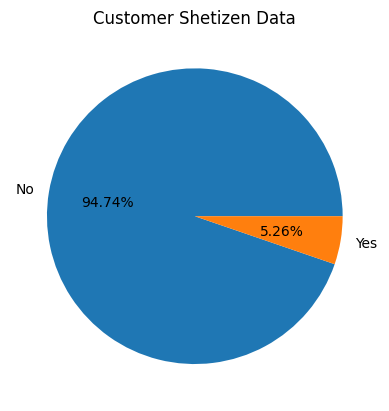

In [62]:
gb = df.groupby("Shetizen").agg({"Shetizen":"count"})
print(gb)
plt.pie(gb["Shetizen"] , labels = gb.index ,autopct = "%1.2f%%" )
plt.title("Customer Shetizen Data")

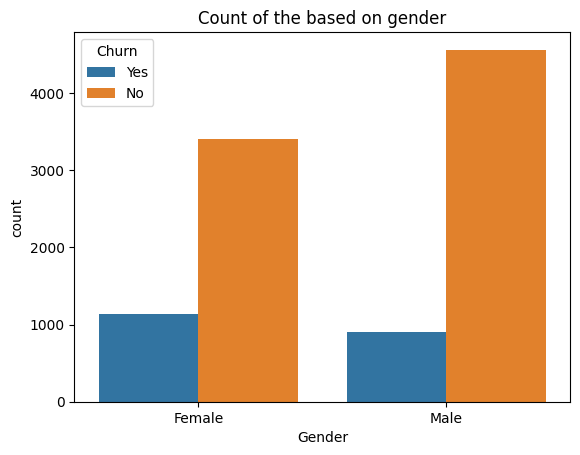

In [64]:
sns.countplot(x = 'Gender',data = df ,hue = "Churn")
plt.title("Count of the based on gender")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

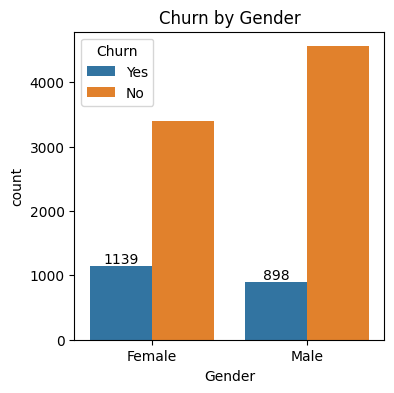

In [65]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x="Gender" , data= df , hue = 'Churn' )#groups the data points by their species, and each group is assigned a unique color. 
ax.bar_label(ax.containers[0])
plt.title("Churn by Gender")

plt.show

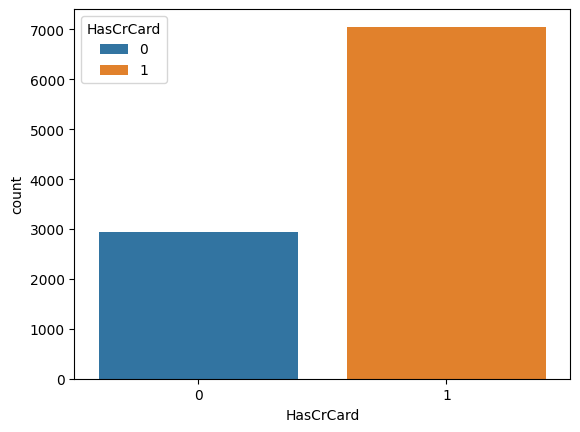

In [68]:
sns.countplot(x="HasCrCard" , data =df, hue ="HasCrCard") 
plt.show()

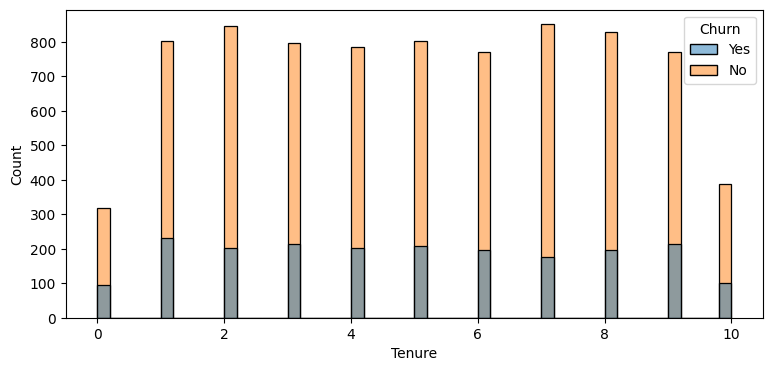

In [70]:
plt.figure(figsize = (9,4))
sns.histplot(x = "Tenure" , data = df , hue="Churn" ,  bins = 50)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

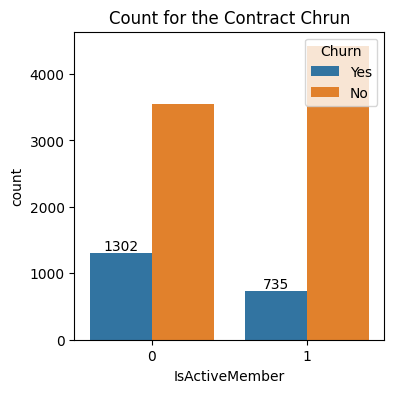

In [72]:
# Active members in Churm 
plt.figure(figsize=(4,4))
ax =sns.countplot(x = "IsActiveMember" , data = df , hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count for the Contract Chrun")
plt.show

In [73]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Churn', 'Shetizen'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

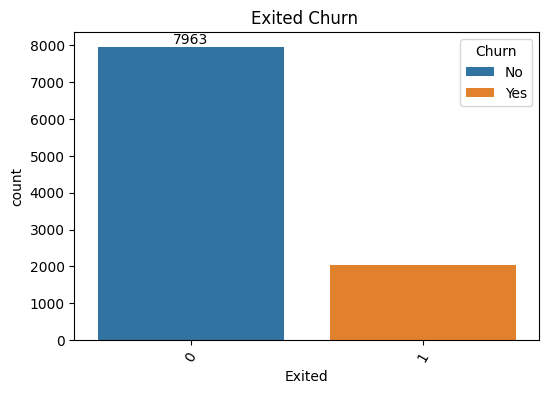

In [78]:
# customer check a electronic payment method
plt.figure(figsize=(6,4))
ax =sns.countplot(x = "Exited" , data = df , hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Exited Churn ")
plt.xticks(rotation=60)
plt.show